In [1]:
# Unit 8 Project 1      
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns 
import datetime as dt
import plotly.express as px
import os
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline
import hvplot.pandas
from pandas_datareader import data as wb

In [2]:
#print(f"Current Working Directory: {Path.cwd()}")

In [3]:
def get_simulation(ticker, name):
    name = pd.DataFrame()
    name[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2015-1-1', end='2020-7-24')['Adj Close']
    return name
DJI = get_simulation("^DJI", "DJI")
INX = get_simulation("^GSPC", "INX")
TSX = get_simulation("^GSPTSE", "TSX")
NDAQ = get_simulation("^IXIC", "NDAQ")
NI225 = get_simulation("^N225", "N225")
SX5E = get_simulation("^STOXX50E", "SX5E")
XJO = get_simulation("^AXJO", "XJO")
Gold = get_simulation("GC=F", "Gold")
CrudeOil = get_simulation("CL=F", "CrudeOil")
SHA = get_simulation("000001.SS", "Shanghai")
HSI = get_simulation("^HSI", "HangSeng")

# Save the stock data a csv file
DJI.to_csv("Data/DJI.csv")
INX.to_csv("Data/INX.csv")
TSX.to_csv("Data/TSX.csv")
NDAQ.to_csv("Data/NDAQ.csv")
NI225.to_csv("Data/NI225.csv")
SX5E.to_csv("Data/SX5E.csv")
XJO.to_csv("Data/XJO.csv")
Gold.to_csv("Data/Gold.csv")
CrudeOil.to_csv("Data/CrudeOil.csv")
SHA.to_csv("Data/SHA.csv")
HSI.to_csv("Data/HSI.csv")

##### YAHOOFINANCE API ticker information is not NOT available for TSX 60, FTSEMIB and UKX - for which googlefinance was 
##### used to manually extract the ticker details and save into csv file

In [4]:
############################# Data Importing #################
# Import different stock market indexes full dataset from 1 Jan 2015 to 24 July 2020       
DJI_df = pd.read_csv(Path("Data/DJI.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
INX_df = pd.read_csv(Path("Data/INX.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
TSX_df = pd.read_csv(Path("Data/TSX.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
TX60_df = pd.read_csv(Path("Data/TX60.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)      
HSI_df = pd.read_csv(Path("Data/HSI.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
NDAQ_df = pd.read_csv(Path("Data/NDAQ.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
NI225_df = pd.read_csv(Path("Data/NI225.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
SHA_df = pd.read_csv(Path("Data/SHA.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
SX5E_df = pd.read_csv(Path("Data/SX5E.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)  
FTSEMIB_df = pd.read_csv(Path("Data/FTSEMIB.csv") ,index_col="Date", parse_dates=True, infer_datetime_format=True)
UKX_df = pd.read_csv(Path("Data/UKX.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
XJO_df = pd.read_csv(Path("Data/XJO.csv") ,index_col="Date", parse_dates=True, infer_datetime_format=True)
CrudeOil_df = pd.read_csv(Path("Data/CrudeOil.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
Gold_df = pd.read_csv(Path("Data/Gold.csv"),index_col="Date", parse_dates=True, infer_datetime_format=True)
Gold_df.head()

GC=F
Date                   
2015-01-02  1186.000000
2015-01-05  1203.900024
2015-01-06  1219.300049
2015-01-07  1210.599976
2015-01-08  1208.400024

In [5]:
############################# Data Sorting#################
DJI_df = DJI_df.sort_values("Date")
INX_df = INX_df.sort_values("Date")
TSX_df = TSX_df.sort_values("Date")
TX60_df = TX60_df.sort_values("Date")
HSI_df = HSI_df.sort_values("Date")
NDAQ_df = NDAQ_df.sort_values("Date")
NI225_df = NI225_df.sort_values("Date")
SHA_df = SHA_df.sort_values("Date")
SX5E_df = SX5E_df.sort_values("Date")
FTSEMIB_df = FTSEMIB_df.sort_values("Date")
UKX_df = UKX_df.sort_values("Date")
XJO_df = XJO_df.sort_values("Date")
CrudeOil_df = CrudeOil_df.sort_values("Date")
Gold_df = Gold_df.sort_values("Date")

In [6]:
############################# Renaming Column Names #################
DJI_df.columns.values[0] = "DJI"
INX_df.columns.values[0] = "INX"
TSX_df.columns.values[0] = "TSX"
TX60_df.columns.values[0] = "TX60"
HSI_df.columns.values[0] = "HSI"
NDAQ_df.columns.values[0] = "NDAQ"
NI225_df.columns.values[0] = "NI225"
SHA_df.columns.values[0] = "SHA"
SX5E_df.columns.values[0] = "SX5E"
FTSEMIB_df.columns.values[0] = "FTSEMIB"
UKX_df.columns.values[0] = "UKX"
XJO_df.columns.values[0] = "XJO"
CrudeOil_df.columns.values[0] = "CrudeOil"
Gold_df.columns.values[0] = "GOLD"
Gold_df.head()

GOLD
Date                   
2015-01-02  1186.000000
2015-01-05  1203.900024
2015-01-06  1219.300049
2015-01-07  1210.599976
2015-01-08  1208.400024

In [7]:
############################# Combining all the market indices for analysis #################
combined_portfolios_df = pd.concat(
     [DJI_df , INX_df, TSX_df, TX60_df, HSI_df, NDAQ_df, NI225_df, SHA_df, SX5E_df, FTSEMIB_df, UKX_df, XJO_df, 
      CrudeOil_df, Gold_df], axis="columns", join="inner"
 )
combined_portfolios_df
combined_portfolios_df.head(10)

DJI          INX           TSX    TX60           HSI  \
Date                                                                        
2015-01-05  17501.650391  2020.579956  14392.700195  838.62  23721.320312   
2015-01-06  17371.640625  2002.609985  14246.799805  831.13  23485.410156   
2015-01-07  17584.519531  2025.900024  14285.000000  833.20  23681.259766   
2015-01-08  17907.869141  2062.139893  14457.700195  845.47  23835.529297   
2015-01-13  17613.679688  2023.030029  14187.200195  828.40  24215.970703   
2015-01-14  17427.089844  2011.270020  14084.400391  821.63  24112.599609   
2015-01-15  17320.710938  1992.670044  14041.799805  818.46  24350.910156   
2015-01-20  17515.230469  2022.550049  14308.400391  834.84  23951.160156   
2015-01-21  17554.279297  2032.119995  14560.400391  851.52  24352.580078   
2015-01-22  17813.980469  2063.149902  14764.000000  864.46  24522.630859   

                   NDAQ         NI225          SHA         SX5E   FTSEMIB  \
Date                                                                        
2015-01-05  4652.569824  17408.710938  3350.519043  3023.139893  18188.44   
2015-01-06  4592.740234  16883.189453  3351.446045  3007.909912  18143.26   
2015-01-07  4650.470215  16885.330078  3373.954102  3026.790039  18123.45   
2015-01-08  4736.189941  17167.099609  3293.456055  3135.080078  18791.83   
2015-01-13  4661.500000  17087.710938  3235.301025  3133.860107  18708.93   
2015-01-14  4639.319824  16795.960938  3222.437012  3089.669922  18410.68   
2015-01-15  4570.819824  17108.699219  3336.455078  3157.360107  18844.52   
2015-01-20  4654.850098  17366.300781  3173.052002  3244.919922  19658.66   
2015-01-21  4667.419922  17280.480469  3323.611084  3269.729980  19981.41   
2015-01-22  4750.399902  17329.019531  3343.343994  3322.649902  20469.74   

                UKX          XJO   CrudeOil         GOLD  
Date                                                      
2015-01-05  6417.16  5364.799805  50.040001  1203.900024  
2015-01-06  6366.51  5353.600098  47.930000  1219.300049  
2015-01-07  6419.83  5381.500000  48.650002  1210.599976  
2015-01-08  6569.96  5465.600098  48.790001  1208.400024  
2015-01-13  6542.20  5353.600098  45.889999  1234.300049  
2015-01-14  6388.46  5331.399902  48.480000  1234.400024  
2015-01-15  6498.78  5299.200195  46.250000  1264.699951  
2015-01-20  6620.10  5393.399902  46.389999  1294.199951  
2015-01-21  6728.04  5419.899902  47.779999  1293.699951  
2015-01-22  6796.63  5501.799805  46.310001  1300.699951

In [8]:
# Check Data Types in DataFrame
combined_portfolios_df.dtypes

DJI         float64
INX         float64
TSX         float64
TX60        float64
HSI         float64
NDAQ        float64
NI225       float64
SHA         float64
SX5E        float64
FTSEMIB     float64
UKX         float64
XJO         float64
CrudeOil    float64
GOLD        float64
dtype: object

In [9]:
# Checking the count of each column in the dataframe
combined_portfolios_df.count()

DJI         1011
INX         1011
TSX         1011
TX60        1011
HSI         1011
NDAQ        1011
NI225       1011
SHA         1011
SX5E        1011
FTSEMIB     1011
UKX         1011
XJO         1011
CrudeOil    1011
GOLD        1011
dtype: int64

In [10]:
############################# Overall Anlysis using all 14 market indices #################
# Calculate Daily Returns and dropping null values
combined_portfolios_df = combined_portfolios_df.pct_change().dropna().copy()
combined_portfolios_df.head()

DJI       INX       TSX      TX60       HSI      NDAQ  \
Date                                                                     
2015-01-06 -0.007428 -0.008893 -0.010137 -0.008931 -0.009945 -0.012859   
2015-01-07  0.012254  0.011630  0.002681  0.002491  0.008339  0.012570   
2015-01-08  0.018388  0.017888  0.012090  0.014726  0.006514  0.018432   
2015-01-13 -0.016428 -0.018966 -0.018710 -0.020190  0.015961 -0.015770   
2015-01-14 -0.010593 -0.005813 -0.007246 -0.008172 -0.004269 -0.004758   

               NI225       SHA      SX5E   FTSEMIB       UKX       XJO  \
Date                                                                     
2015-01-06 -0.030187  0.000277 -0.005038 -0.002484 -0.007893 -0.002088   
2015-01-07  0.000127  0.006716  0.006277 -0.001092  0.008375  0.005211   
2015-01-08  0.016687 -0.023859  0.035777  0.036879  0.023385  0.015628   
2015-01-13 -0.004624 -0.017658 -0.000389 -0.004411 -0.004225 -0.020492   
2015-01-14 -0.017074 -0.003976 -0.014101 -0.015942 -0.023500 -0.004147   

            CrudeOil      GOLD  
Date                            
2015-01-06 -0.042166  0.012792  
2015-01-07  0.015022 -0.007135  
2015-01-08  0.002878 -0.001817  
2015-01-13 -0.059438  0.021433  
2015-01-14  0.056439  0.000081

In [11]:
# Checking for Nulls
combined_portfolios_df.isnull().sum()

DJI         0
INX         0
TSX         0
TX60        0
HSI         0
NDAQ        0
NI225       0
SHA         0
SX5E        0
FTSEMIB     0
UKX         0
XJO         0
CrudeOil    0
GOLD        0
dtype: int64

In [12]:
# Checking the count of columns in the dataframe after daily returns
combined_portfolios_df.count()

DJI         1010
INX         1010
TSX         1010
TX60        1010
HSI         1010
NDAQ        1010
NI225       1010
SHA         1010
SX5E        1010
FTSEMIB     1010
UKX         1010
XJO         1010
CrudeOil    1010
GOLD        1010
dtype: int64

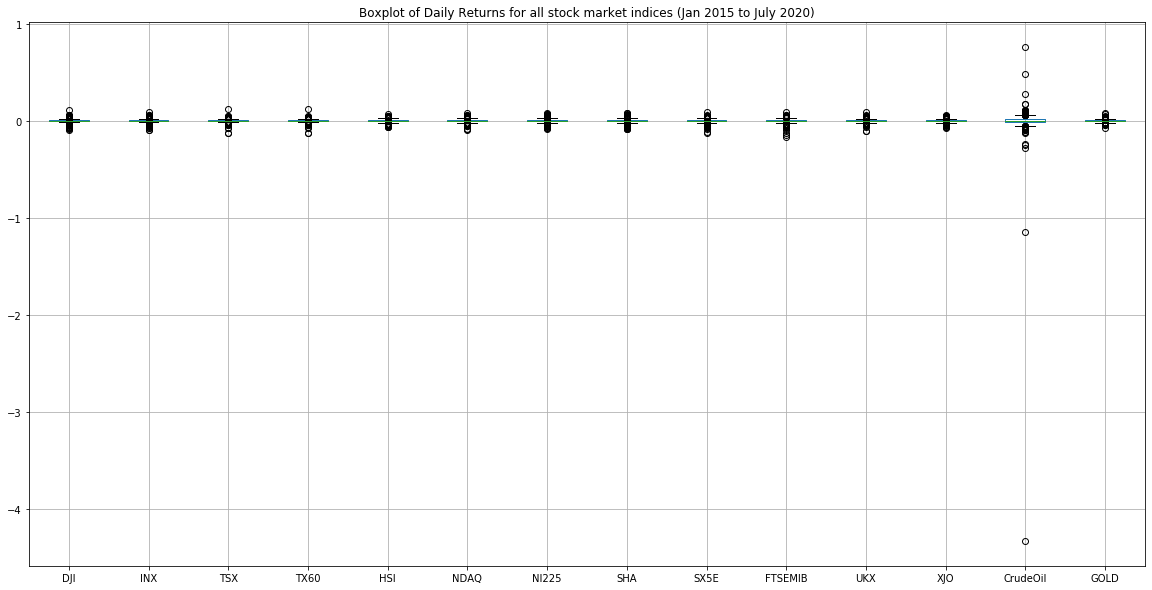

In [13]:
# Box plot to visually show risk
combined_portfolios_df.boxplot(figsize=(20,10))
plt.title('Boxplot of Daily Returns for all stock market indices (Jan 2015 to July 2020)')
plt.savefig("Images/boxplot_all_indices.png")

Based on the above boxplot, it is clear that Crude Oil is a major outlier

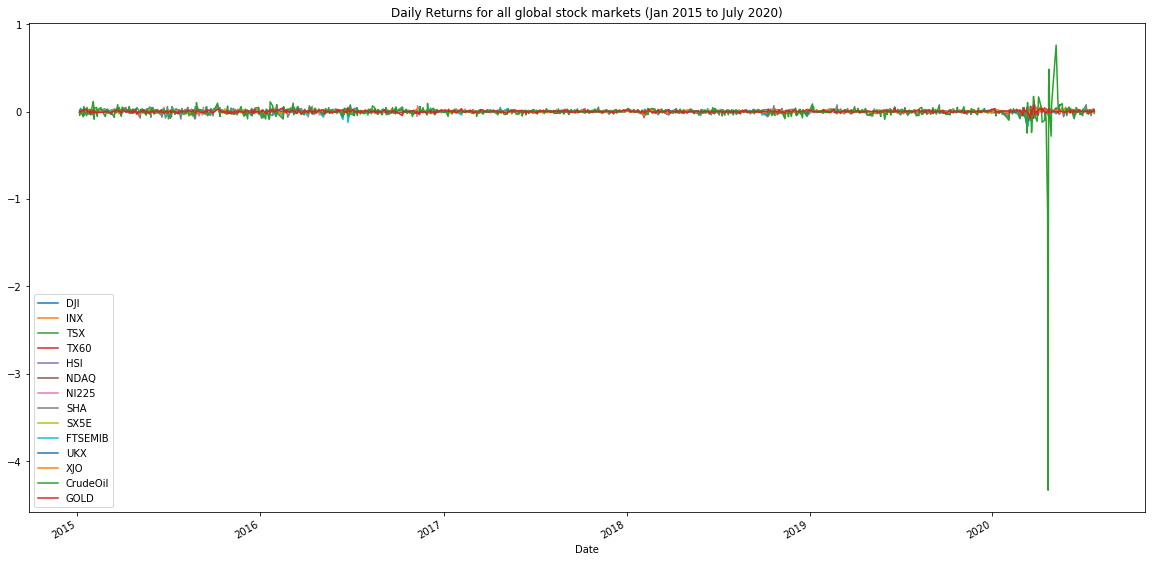

In [14]:
# Analysis - calculate and visualize performance and risk metrics for the stock markets
# Plotting the daily returns and cumulative returns.
combined_portfolios_df.plot(title='Daily Returns for all global stock markets (Jan 2015 to July 2020)', figsize=(20,10))
plt.savefig("Images/daily_returns_all_indices.png")

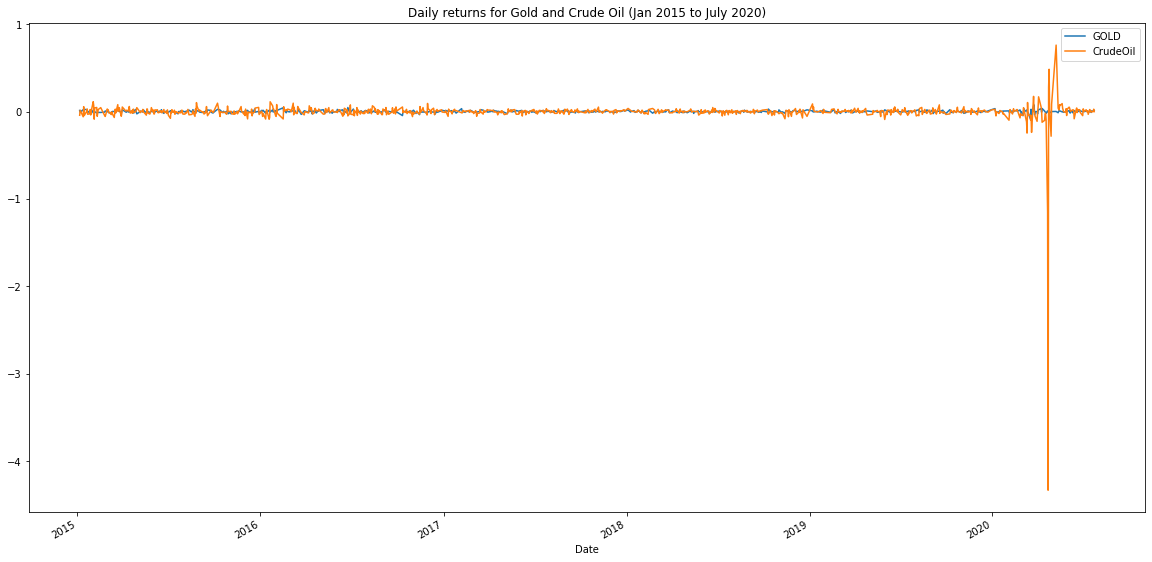

In [15]:
############################# Figuring our Outliers indices #################
# Plotting the daily returns and cumulative returns of commodities
combined_portfolios_df_comm = combined_portfolios_df[["GOLD", "CrudeOil"]]
combined_portfolios_df_comm.plot(title='Daily returns for Gold and Crude Oil (Jan 2015 to July 2020)', figsize=(20,10))
plt.savefig("Images/daily_returns_commodoties.png")

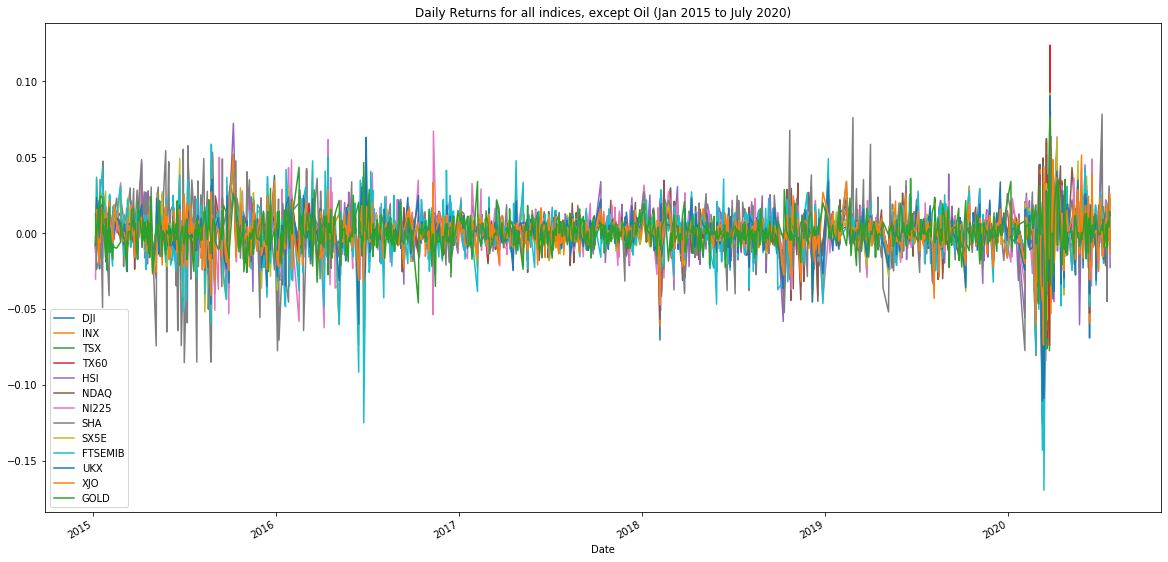

In [16]:
# Dropping Oil as it is an outlier
combined_portfolios_df_noil = combined_portfolios_df.drop(columns=['CrudeOil'])
combined_portfolios_df_noil.plot(title='Daily Returns for all indices, except Oil (Jan 2015 to July 2020)', figsize=(20,10))
plt.savefig("Images/daily_returns_all_indices_no_oil.png")

DJI, INX,TSX, TX60, NASDAQ have many outliers


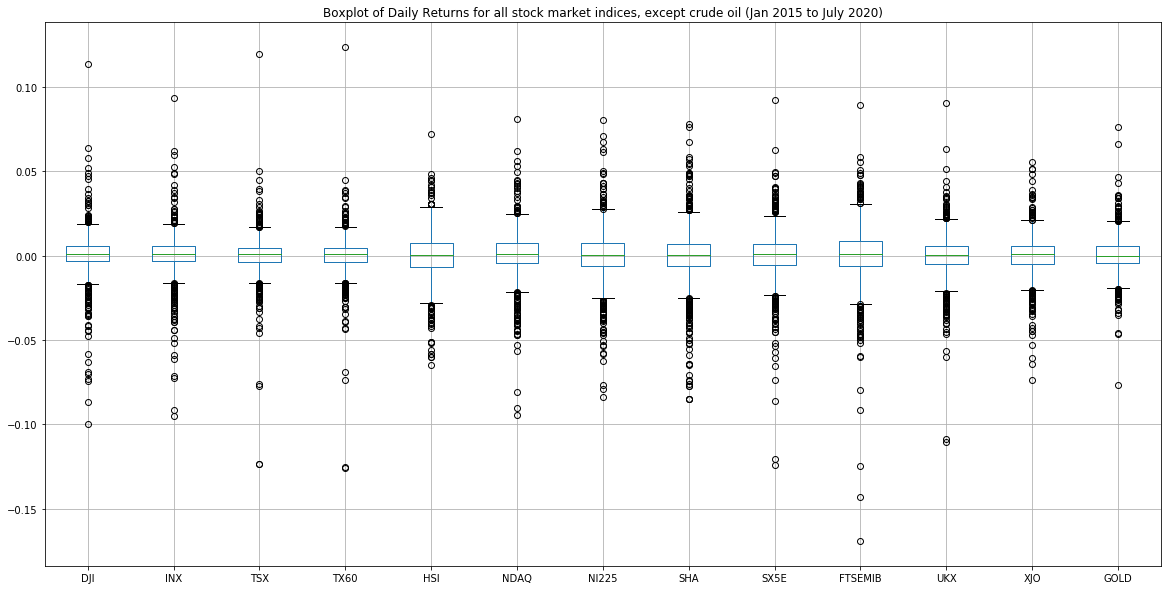

In [17]:
# Box plot to visually show risk
combined_portfolios_df_noil.boxplot(figsize=(20,10))
plt.title('Boxplot of Daily Returns for all stock market indices, except crude oil (Jan 2015 to July 2020)')
plt.savefig("Images/boxplot_all_indices_no_oil.png")
print("DJI, INX,TSX, TX60, NASDAQ have many outliers")

In [18]:
# Calculate cumulative returns of dataframe without crude oil
cumulative_returns_noil = (1 + combined_portfolios_df_noil).cumprod()
cumulative_returns_noil.head()

DJI       INX       TSX      TX60       HSI      NDAQ  \
Date                                                                     
2015-01-06  0.992572  0.991107  0.989863  0.991069  0.990055  0.987141   
2015-01-07  1.004735  1.002633  0.992517  0.993537  0.998311  0.999549   
2015-01-08  1.023210  1.020568  1.004516  1.008168  1.004815  1.017973   
2015-01-13  1.006401  1.001213  0.985722  0.987813  1.020853  1.001919   
2015-01-14  0.995740  0.995392  0.978579  0.979741  1.016495  0.997152   

               NI225       SHA      SX5E   FTSEMIB       UKX       XJO  \
Date                                                                     
2015-01-06  0.969813  1.000277  0.994962  0.997516  0.992107  0.997912   
2015-01-07  0.969936  1.006994  1.001207  0.996427  1.000416  1.003113   
2015-01-08  0.986121  0.982969  1.037028  1.033174  1.023811  1.018789   
2015-01-13  0.981561  0.965612  1.036624  1.028617  1.019485  0.997912   
2015-01-14  0.964802  0.961772  1.022007  1.012219  0.995528  0.993774   

                GOLD  
Date                  
2015-01-06  1.012792  
2015-01-07  1.005565  
2015-01-08  1.003738  
2015-01-13  1.025251  
2015-01-14  1.025334

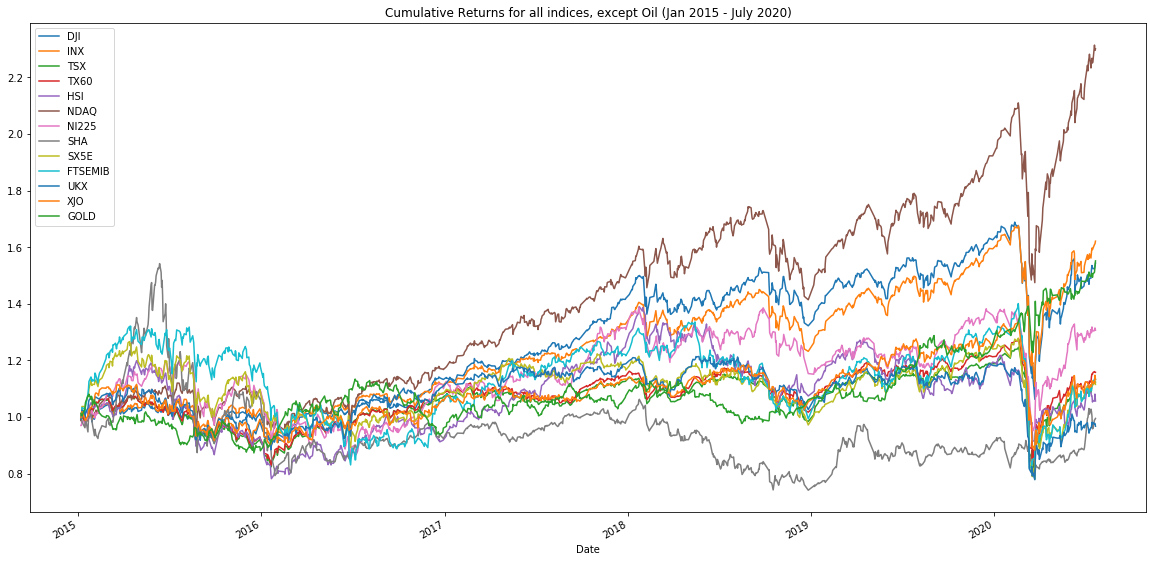

In [19]:
# Plotting cumulative returns for all market indices except oil
cumulative_returns_noil.plot(title='Cumulative Returns for all indices, except Oil (Jan 2015 - July 2020)', figsize=(20,10))
plt.savefig("Images/cumulative_returns_all_indices_no_oil.png")

In [20]:
# Calculate the standard deviation for each portfolio
cumulative_returns_noil_std = cumulative_returns_noil.std()
cumulative_returns_noil_std.head(10)

DJI        0.214777
INX        0.190182
TSX        0.077514
TX60       0.083985
HSI        0.129217
NDAQ       0.324080
NI225      0.124762
SHA        0.124424
SX5E       0.084938
FTSEMIB    0.122848
dtype: float64

In [21]:
# Calculate the annualized standard deviation (252 trading days) exluding oil
combined_portfolios_annualized_std = cumulative_returns_noil_std * np.sqrt(252)
combined_portfolios_annualized_std.head(7)

DJI      3.409484
INX      3.019049
TSX      1.230491
TX60     1.333214
HSI      2.051251
NDAQ     5.144613
NI225    1.980529
dtype: float64

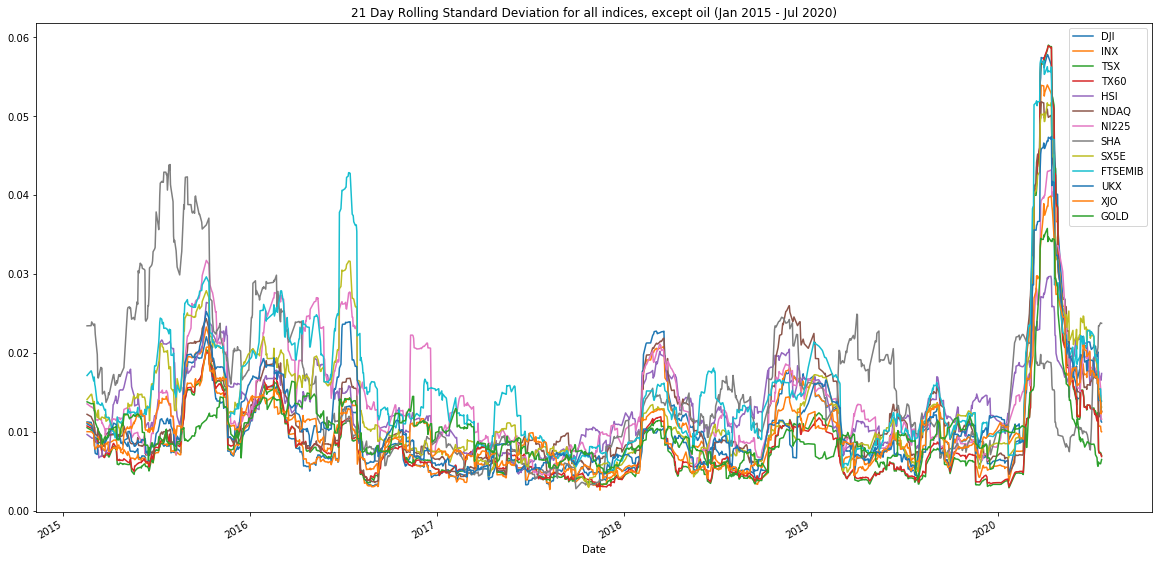

In [22]:
# #Rolling Statistics - Risk changes over time. Analyze the rolling statistics for Risk and Beta.
#sorting before the moving averages
combined_portfolios_df_noil = combined_portfolios_df_noil.sort_index()
#Calculating rolling std using 21 trading day window
rolling_std = combined_portfolios_df_noil.rolling(window=21).std().plot(title = '21 Day Rolling Standard Deviation for all indices, except oil (Jan 2015 - Jul 2020)', figsize =[20,10])
#plotting
rolling_std
plt.savefig("Images/rolling_std_all_indices_no_oil.png")

In [23]:
#Construct a correlation table
correlation_table = combined_portfolios_df_noil.corr()
correlation_table

DJI       INX       TSX      TX60       HSI      NDAQ     NI225  \
DJI      1.000000  0.975769  0.806067  0.803206  0.368691  0.884651  0.395603   
INX      0.975769  1.000000  0.815465  0.812162  0.372352  0.945480  0.380835   
TSX      0.806067  0.815465  1.000000  0.994277  0.416793  0.739713  0.418962   
TX60     0.803206  0.812162  0.994277  1.000000  0.410221  0.736535  0.419715   
HSI      0.368691  0.372352  0.416793  0.410221  1.000000  0.367843  0.615787   
NDAQ     0.884651  0.945480  0.739713  0.736535  0.367843  1.000000  0.346361   
NI225    0.395603  0.380835  0.418962  0.419715  0.615787  0.346361  1.000000   
SHA      0.207128  0.211858  0.216194  0.209298  0.569105  0.221031  0.341920   
SX5E     0.636483  0.639269  0.682242  0.687834  0.542679  0.605694  0.538450   
FTSEMIB  0.549910  0.560174  0.614220  0.623193  0.456784  0.528585  0.452984   
UKX      0.639944  0.641908  0.725476  0.724685  0.554031  0.586284  0.483834   
XJO      0.395075  0.400171  0.426576  0.416139  0.360279  0.391029  0.418555   
GOLD    -0.052349 -0.055004 -0.011289 -0.039985  0.003285 -0.061550 -0.098923   

              SHA      SX5E   FTSEMIB       UKX       XJO      GOLD  
DJI      0.207128  0.636483  0.549910  0.639944  0.395075 -0.052349  
INX      0.211858  0.639269  0.560174  0.641908  0.400171 -0.055004  
TSX      0.216194  0.682242  0.614220  0.725476  0.426576 -0.011289  
TX60     0.209298  0.687834  0.623193  0.724685  0.416139 -0.039985  
HSI      0.569105  0.542679  0.456784  0.554031  0.360279  0.003285  
NDAQ     0.221031  0.605694  0.528585  0.586284  0.391029 -0.061550  
NI225    0.341920  0.538450  0.452984  0.483834  0.418555 -0.098923  
SHA      1.000000  0.242689  0.179471  0.266413  0.150941 -0.016710  
SX5E     0.242689  1.000000  0.903099  0.862227  0.416241 -0.140089  
FTSEMIB  0.179471  0.903099  1.000000  0.767126  0.332317 -0.149634  
UKX      0.266413  0.862227  0.767126  1.000000  0.415419 -0.066491  
XJO      0.150941  0.416241  0.332317  0.415419  1.000000 -0.004362  
GOLD    -0.016710 -0.140089 -0.149634 -0.066491 -0.004362  1.000000

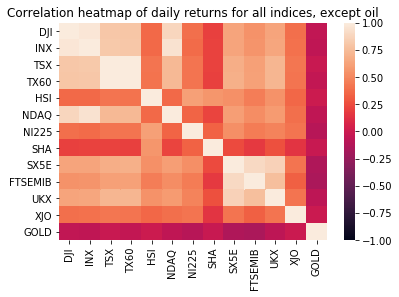

In [24]:
#correlation matrix using a heatmap
sns.heatmap(correlation_table, vmin=-1, vmax=1)
plt.title("Correlation heatmap of daily returns for all indices, except oil")
plt.savefig("Images/heatmap_correlation_daily_returns_no_oil.png")

In [25]:
# Based on Correlation dropping similar market indices and selecting only major market indices
# combined_portfolios_df_noil.head()
combined_portfolios_df_7 = combined_portfolios_df_noil.drop(columns=['DJI', 'TX60', 'FTSEMIB', 'HSI', 'XJO', 'NDAQ'])
combined_portfolios_df_7.head()

INX       TSX     NI225       SHA      SX5E       UKX  \
Date                                                                     
2015-01-06 -0.008893 -0.010137 -0.030187  0.000277 -0.005038 -0.007893   
2015-01-07  0.011630  0.002681  0.000127  0.006716  0.006277  0.008375   
2015-01-08  0.017888  0.012090  0.016687 -0.023859  0.035777  0.023385   
2015-01-13 -0.018966 -0.018710 -0.004624 -0.017658 -0.000389 -0.004225   
2015-01-14 -0.005813 -0.007246 -0.017074 -0.003976 -0.014101 -0.023500   

                GOLD  
Date                  
2015-01-06  0.012792  
2015-01-07 -0.007135  
2015-01-08 -0.001817  
2015-01-13  0.021433  
2015-01-14  0.000081

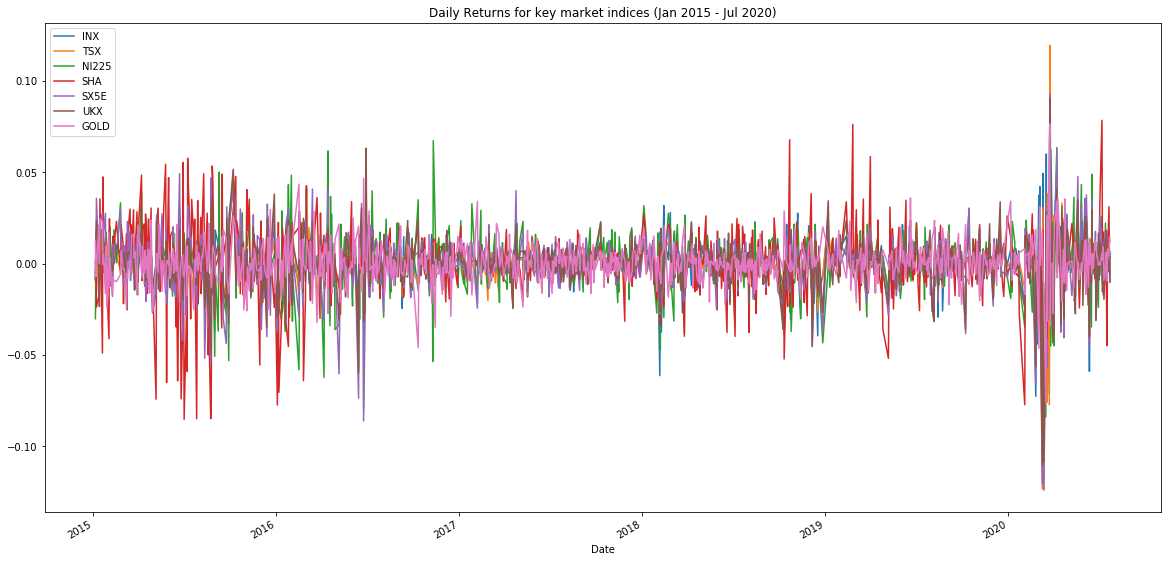

In [26]:
combined_portfolios_df_7.plot(title='Daily Returns for key market indices (Jan 2015 - Jul 2020)', figsize=(20,10))
plt.savefig("Images/daily_returns_key_indices_2015-2020.png")